# Project 2 - Supervised Learning

### Let's first check the data in the **train.csv**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
import time

train_data = pd.read_csv('train.csv')

print(train_data.head())

  policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster   
0   ID00001       0.515874        0.05             0.644231           C1  \
1   ID00002       0.672619        0.02             0.375000           C2   
2   ID00003       0.841110        0.02             0.384615           C3   
3   ID00004       0.900277        0.11             0.432692           C4   
4   ID00005       0.596403        0.11             0.634615           C5   

   population_density  make segment model fuel_type  ... is_brake_assist   
0                4990     1       A    M1       CNG  ...              No  \
1               27003     1       A    M1       CNG  ...              No   
2                4076     1       A    M1       CNG  ...              No   
3               21622     1      C1    M2    Petrol  ...             Yes   
4               34738     2       A    M3    Petrol  ...              No   

  is_power_door_locks is_central_locking  is_power_steering   
0                  No  

### Let's check if there are columns with missing values

In [2]:
cols_with_na = train_data.columns[train_data.isna().any()].tolist()
print('Columns with missing values:', cols_with_na)

Columns with missing values: []


As we can see, there are no missing values in our data set

### Let's now get some more general information of our features

In [3]:
print(train_data.describe())

       policy_tenure    age_of_car  age_of_policyholder  population_density   
count   58592.000000  58592.000000         58592.000000        58592.000000  \
mean        0.611246      0.069424             0.469420        18826.858667   
std         0.414156      0.056721             0.122886        17660.174792   
min         0.002735      0.000000             0.288462          290.000000   
25%         0.210250      0.020000             0.365385         6112.000000   
50%         0.573792      0.060000             0.451923         8794.000000   
75%         1.039104      0.110000             0.548077        27003.000000   
max         1.396641      1.000000             1.000000        73430.000000   

               make       airbags  displacement      cylinder      gear_box   
count  58592.000000  58592.000000  58592.000000  58592.000000  58592.000000  \
mean       1.763722      3.137066   1162.355851      3.626963      5.245443   
std        1.136988      1.832641    266.304786    

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x0000024A5B17D8A0> (for post_execute):


KeyboardInterrupt: 

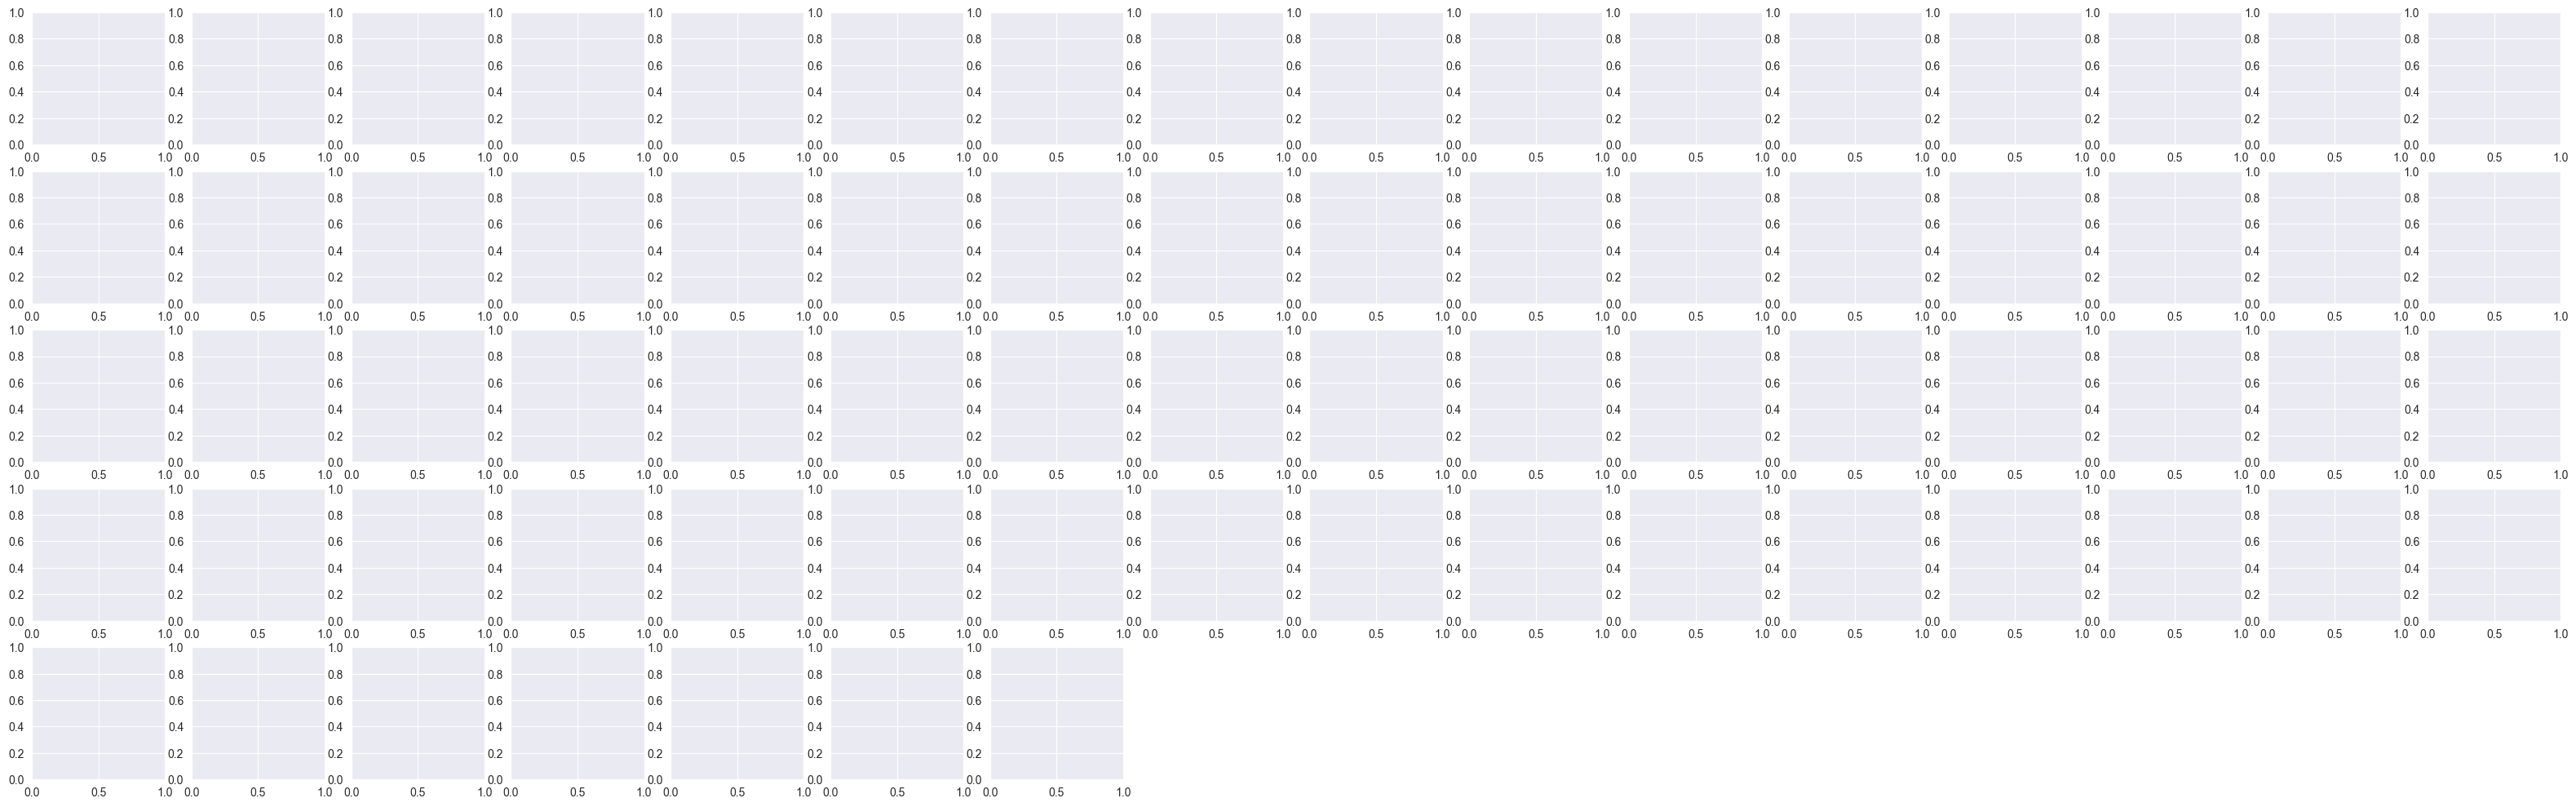

In [10]:
%matplotlib inline

sb.pairplot(train_data)

After some investigating, there are no major outliers that require work.
There are some variables that seem to have no correlation with the `is_claim` feature

### Now let's check what features have no correlation with the test feature

                     policy_tenure  age_of_car  age_of_policyholder   
policy_tenure             1.000000    0.166312             0.143676  \
age_of_car                0.166312    1.000000            -0.035427   
age_of_policyholder       0.143676   -0.035427             1.000000   
population_density       -0.100307   -0.062255             0.009669   
make                      0.086101    0.188122            -0.031989   
airbags                   0.103981    0.209073            -0.008041   
displacement              0.194361    0.393208            -0.023764   
cylinder                  0.191185    0.379522             0.004183   
gear_box                  0.095305    0.201579            -0.003115   
turning_radius            0.166426    0.332716            -0.016764   
length                    0.190869    0.383177            -0.020138   
width                     0.213228    0.414104            -0.006135   
height                    0.119055    0.259156            -0.053930   
gross_

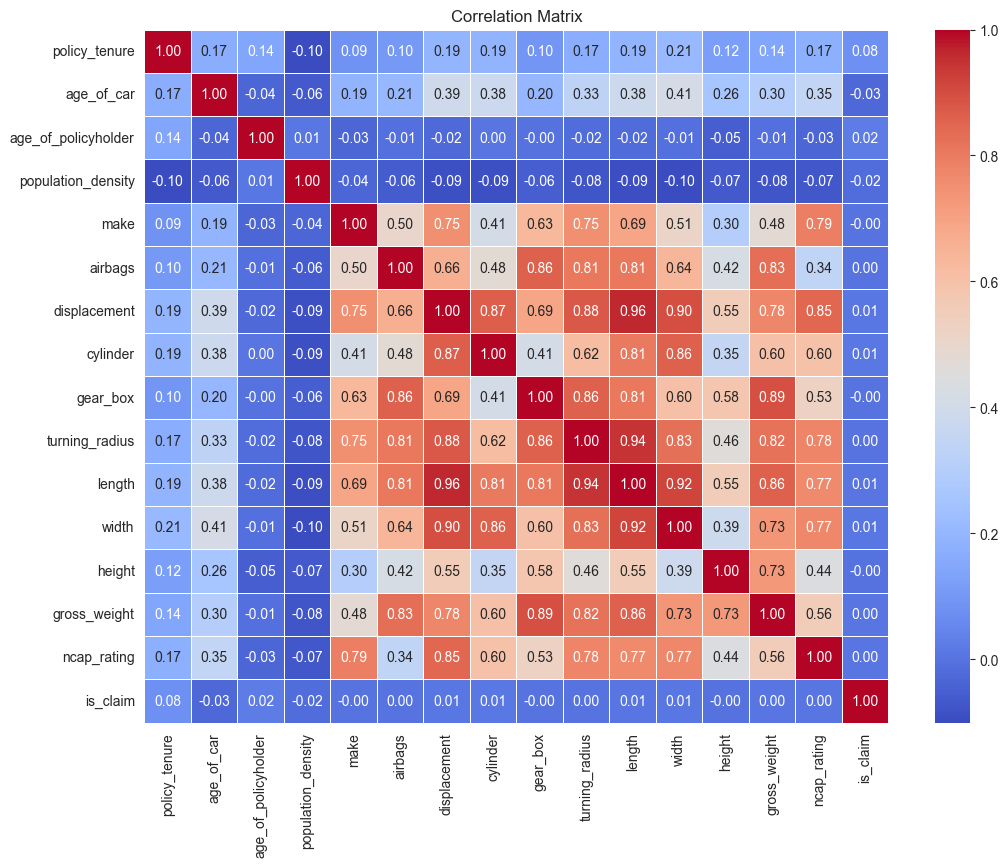

In [4]:

numeric_columns = train_data.select_dtypes(include='number')
train_data_numeric = train_data[numeric_columns.columns]


correlation_matrix = train_data_numeric.corr()

print(correlation_matrix)

plt.figure(figsize=(12, 9))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

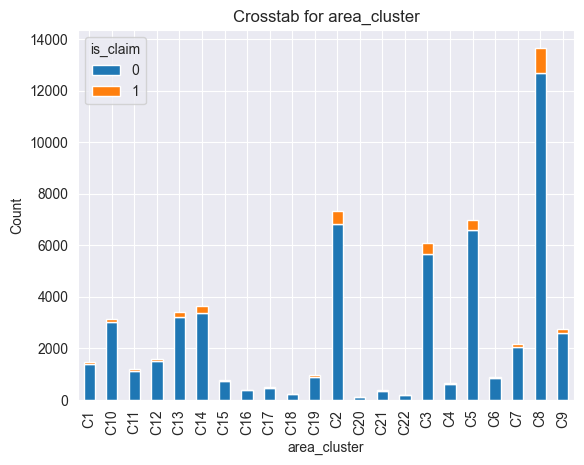

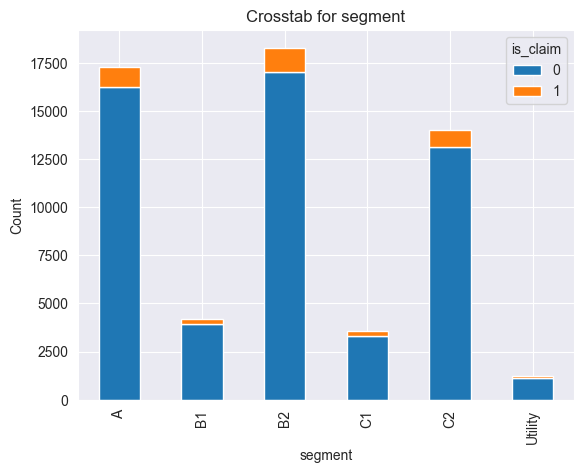

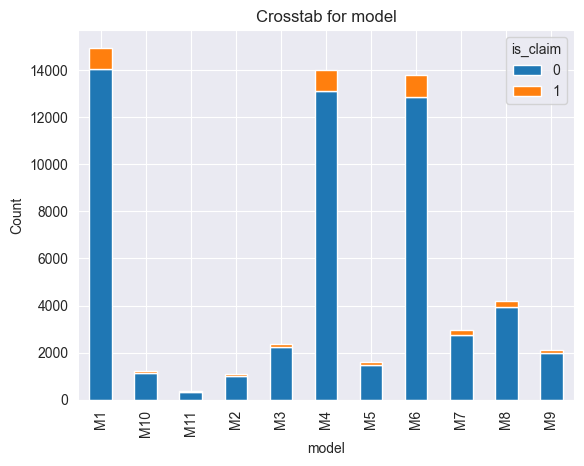

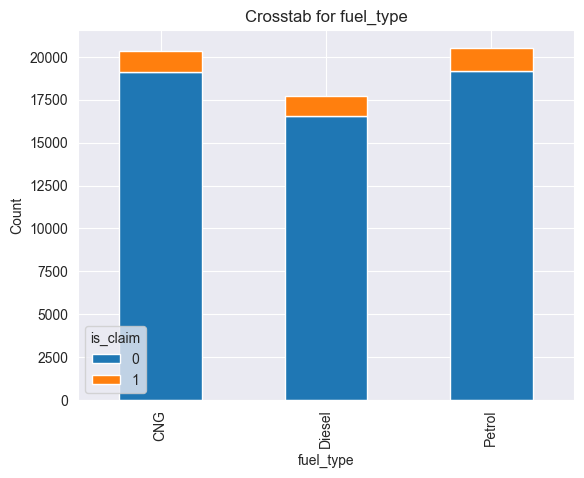

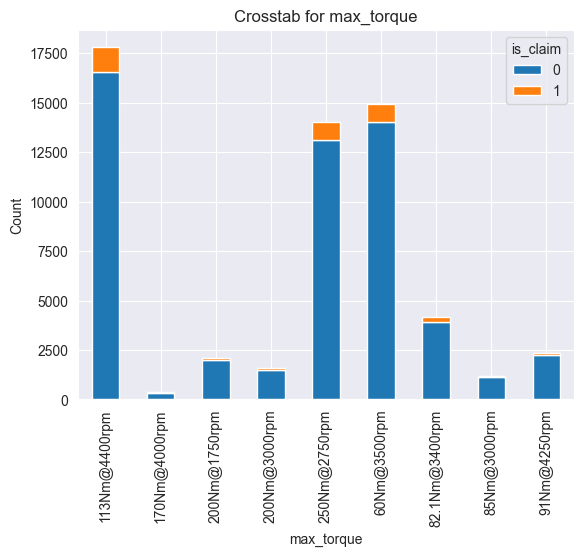

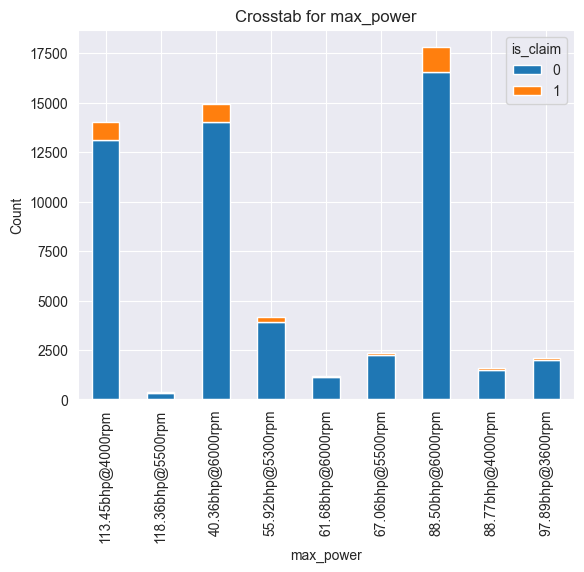

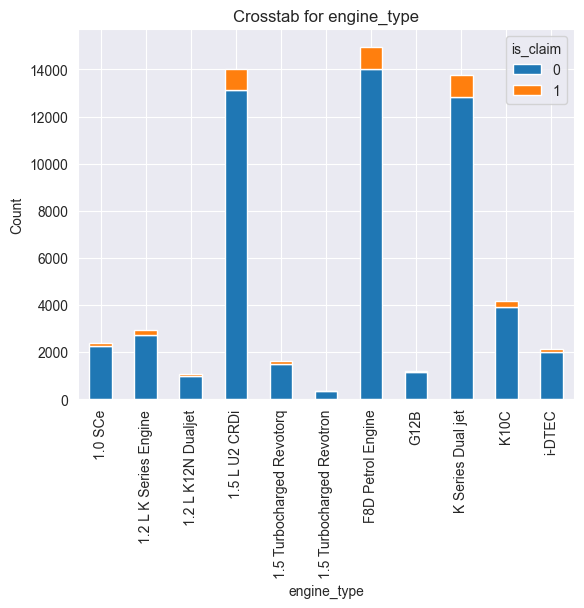

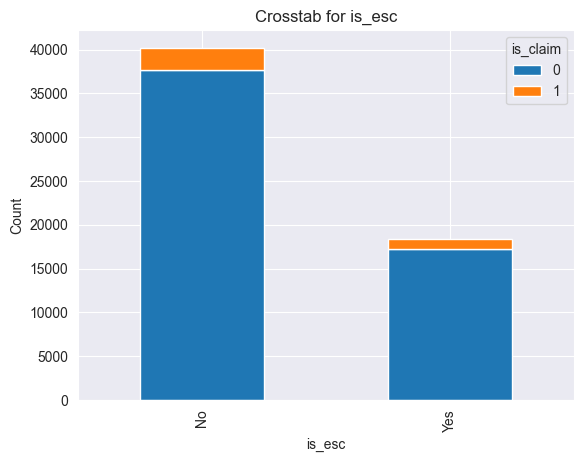

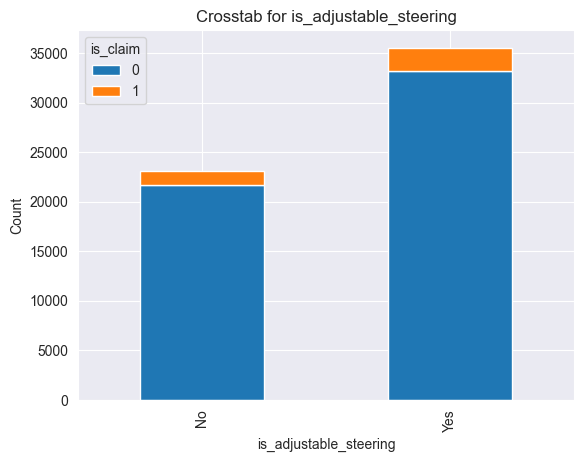

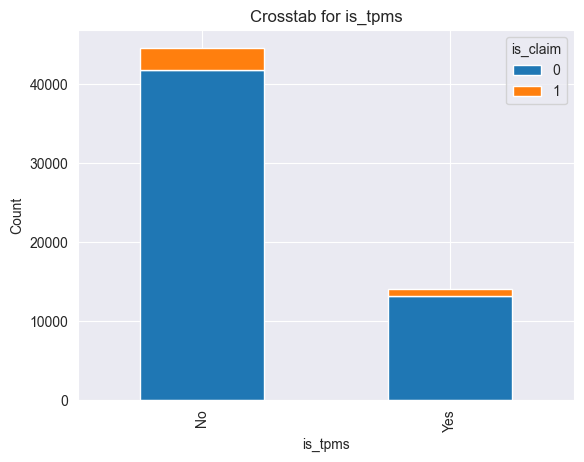

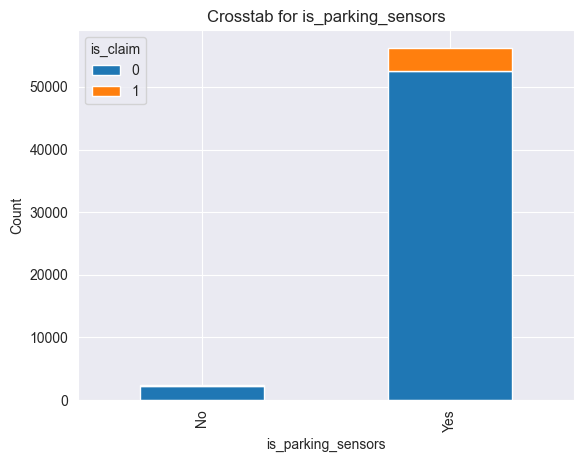

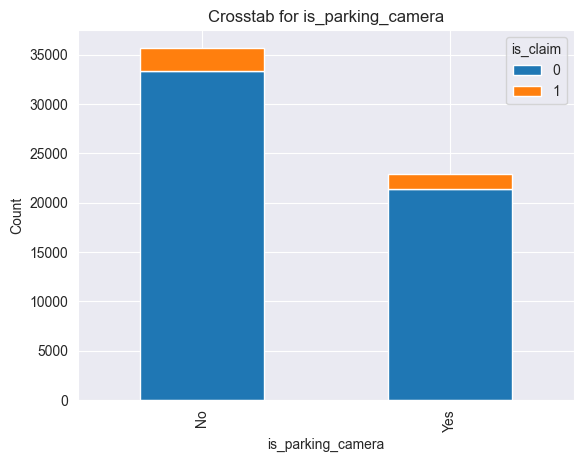

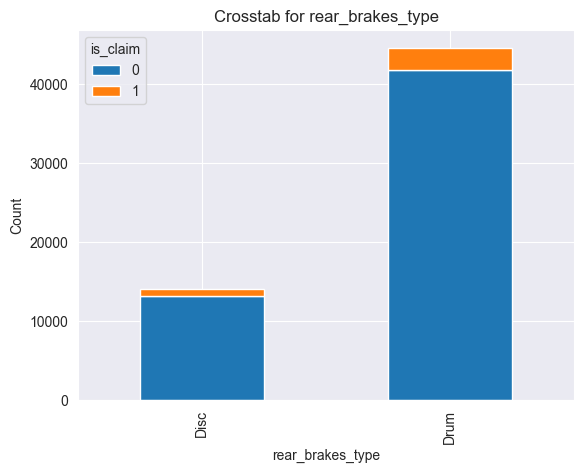

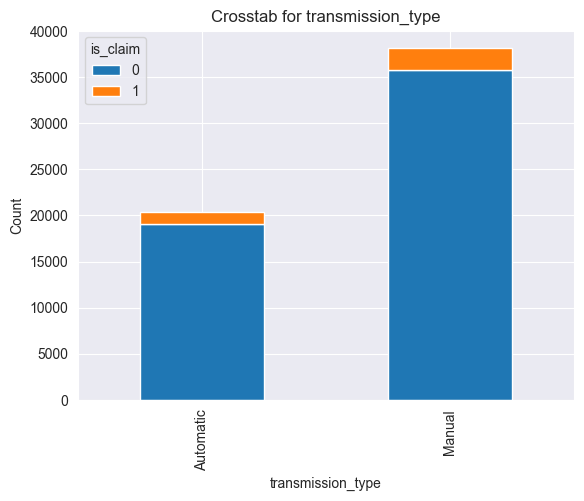

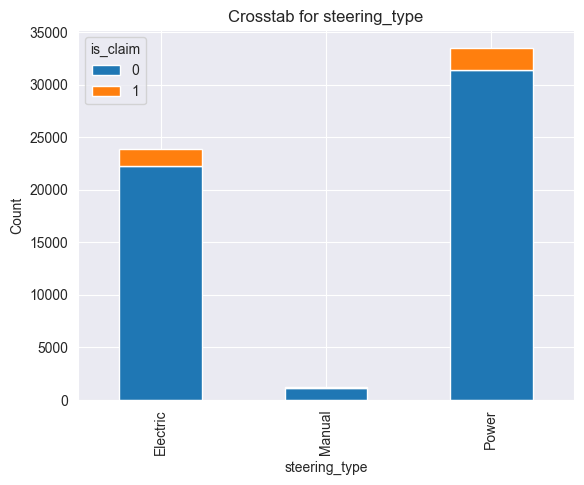

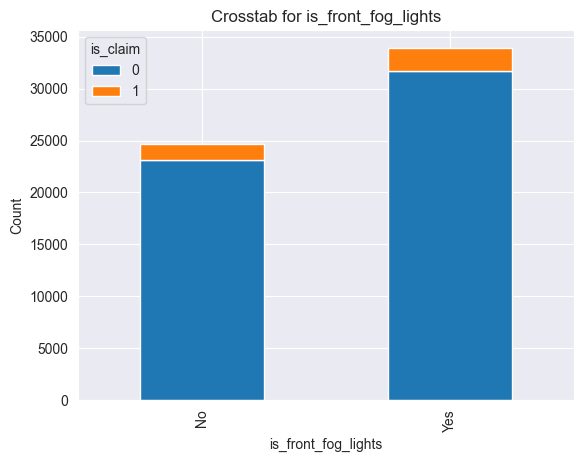

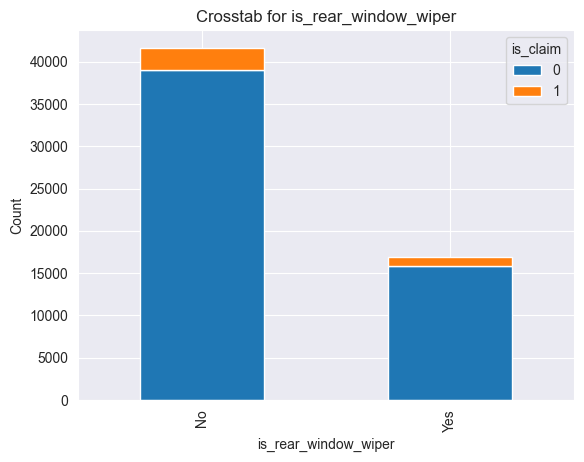

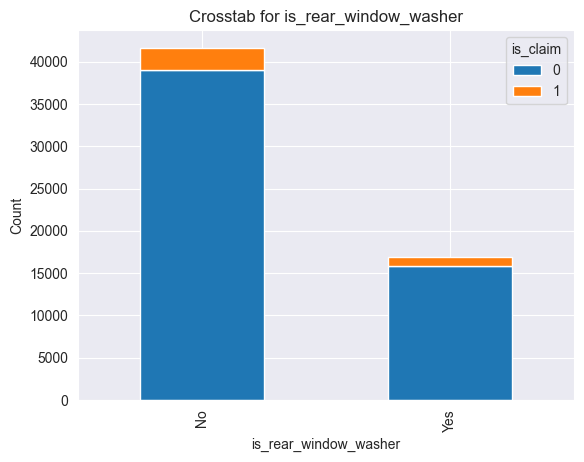

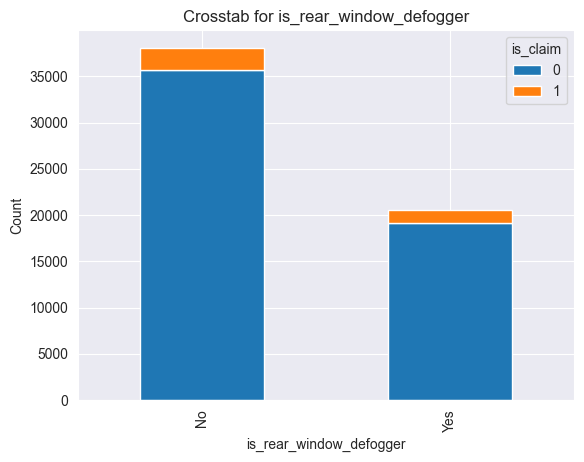

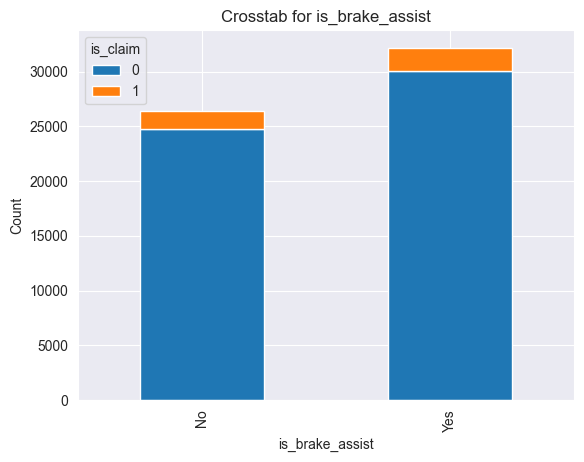

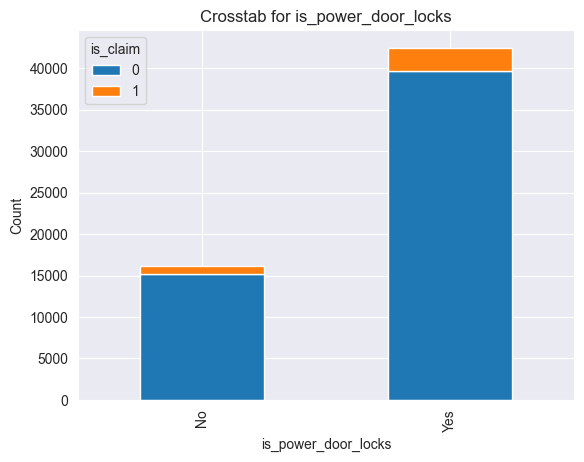

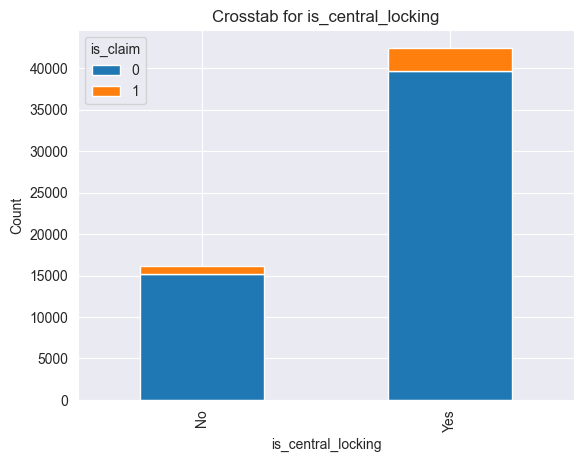

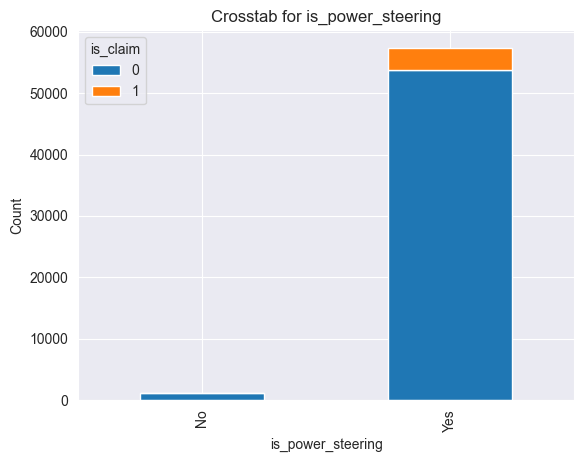

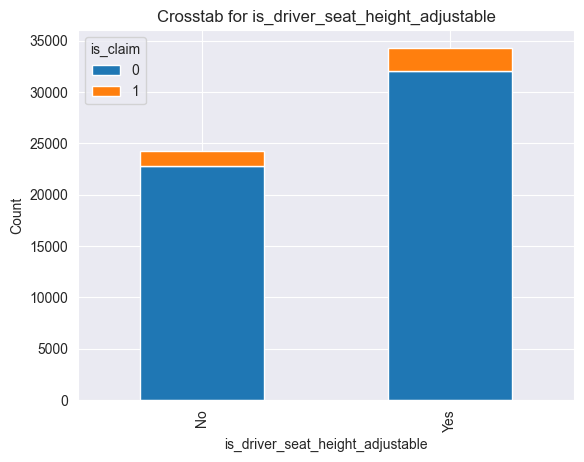

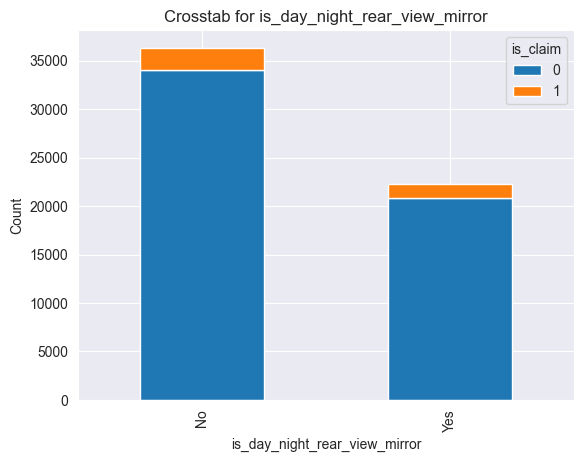

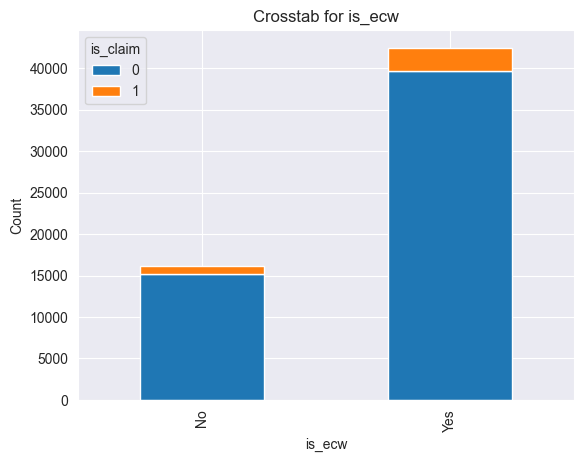

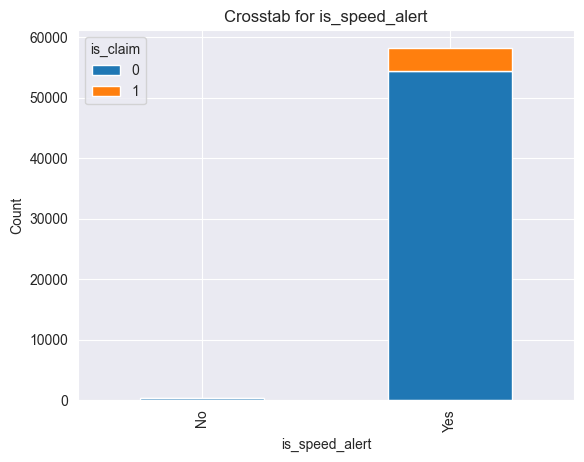

In [25]:
non_numeric_columns = train_data.select_dtypes(exclude='number')

for column in non_numeric_columns:
    if 'id' in column: continue
    crosstab_table = pd.crosstab(train_data[column], train_data['is_claim'])
    crosstab_table.plot(kind='bar', stacked=True)

    plt.title(f'Crosstab for {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

    plt.show()

